# Matheus law

Consider _two scattering mechanisms_.

If you consider each one _as the unique_ scattering mechanism, you can assign it a lifetime (average scattering time, when this is the **unique** scattering mechanism) $\tau_1, \tau_2$:

Then, if you consider the _simultaneous precence_ of both the mechanisms, the average scattering time for an incident particle is given by the Matheus law
$$\tau = (\frac{1}{\tau_1} + \frac{1}{\tau_2})^{-1}$$
This law is _straightforward_ if the two scattering mechanisms are **independent**, **meaning that** the _number of scatters_ of one type is independent on the presence of the other mechanism. In fact, if it is so
$$\text{cont} = \text{cont}_1 + \text{cont}_2$$
where _cont_ is the number of scatterings in the presence of both mechanisms, while $\text{cont}_1$ and $\text{cont}_2$ are the number of scatterings in the presence of only one of the mechanisms.
In all cases the number of scatterings is referred to the same time interval $\Delta t$, so
$$\tau = \frac{\Delta t}{\text{cont}} \quad \tau_i = \frac{\Delta t}{\text{cont}_i}$$
so it follows that
$$\frac{1}{\tau} = \frac{1}{\tau_2} + \frac{1}{\tau_2}$$ 

### When the scattering mechanisms are independent?
- This is so, for example, if the motion of a particle _does not change after a scattering event_. In this case, you can study the interaction of the particle with each kind of target, removing all the targets of the other kind (you can say it holds a _superposition_ principle).

- This is **not** so if a particle leaves the sample after a scattering event.

In the notes we will **verify experimentally** the law in both the above cases.
In the first case you can say there's no need of verifying the law experimentally, because we showed a proof above. But let's consider this former verification as _a way of testing_ the verification method.

### Experimental setup (THE EXPERIMENT SHOWS FLUCTUATIONS THAT ARE TOO HIGH SO CANNOT VERIFY)
Consider a point-like particle moving on the x axis in the x-y plane.

The plane is costellated with targets of _two different kinds_, with densities $n_1, n_2$
- Targets of the first kind are big (large cross section)
- the targets of the second are small (small cross section).

the incident particle scatters with a target if it crosses the x coordinate of the target at a distance in the y direction _less than the cross section_.

After the incident particle scatters, we consider both the cases when:
- The particle does not scatter anymore (it's scattered out of the sample)
- The particle continues to scatter, moving in the same direction and with the same speed.

You can measure $\tau_1$ and $\tau_2$ appearing in the law, _simply by **shutting down** one mechanism of scattering_, by choosing a negative cross section for the other mechanism.

In [153]:
import numpy as np


### Define setup's parameters
X = 100  # Lenght (in units of discrete steps of the incident particle) of the sample
Y = 200  # Height of the sample
N = 200  # Number of incident particles simultaneously generated at the beginning of each cycle time at x = 0

### How we perform the experiment
We generate a _flux_ of incident particles like this:
- At each discrete time, generate $N$ incident particles at $x = 0$ and uniformly distributed along the $y$ axis.
- You propagate those particles until the end of the sample and you register how many scatters of each kind happened.
- After the particles reached the end of the sample, you generate new particles at $x = 0$.

_Now_ you consider that, after a scattering, the motion of the particle is not altered.
_Then_ we'll perform the same simulation but excluding a particle from the simulation after a scattering.

**Note that**: In this first case, as the motion of the particle does not get influenced by the scattering event, the interaction of an incident particle with the targets of the first kind is **independent on the precence** of scattering targets of the **other** kind. So the Matheus law is clear AND there's no need of shutting down one scattering mechanism to measure the $\tau_1$ and $\tau_2$ (average scattering times _as the **unique**_ scattering mechanism) that show up in the law; because you could extimate them simply by using **two separate counters** for the two scattering mechanisms.

**But** we'll measure them by shutting down one of the two mechanisms, _for more clarity_.


At the end of the experiment, we'll calculate the average scattering time, considering as the time taken for passing the sample from one side to the other: the lenght of the sample.

In [150]:
def simul_no_influence(n1, c1, n2, c2):
    ####    Simulates the motion of N particles inciding on a X*Y sample
    ####    with scattering targets placed in positions x_ti, y_ti and cross section c_i and density n_i
    ####    [HERE The motion IS NOT INFLUENCED by the scattering event!!!]
    ####    Returns measured scattering time tau

    # Number of scattering targets of each type
    N1 = int(n1*X*Y)
    N2 = int(n2*X*Y)
    # Locate scattering targets
    x_t1 = np.random.randint(0,X,N1)
    y_t1 = np.random.randint(N1)*Y
    x_t2 = np.random.randint(0,X,N2)
    y_t2 = np.random.rand(N2)*Y

    # Locate initial particles uniformly distributed at x = 0
    x = 0   # Particles move all togheter
    y = np.random.rand(N)*Y

    # Scattering counter
    cont = 0
    # Move particles along x direction at costant, and same, speed
    while x < X:
        x = x + 1
        ## Check for scattering
        for i in range(0, N):
            for j in range(0,N1):
                if np.abs(y[i] - y_t1[j]) < c1/2 and x == x_t1[j]:
                    cont = cont + 1
            for j in range(0,N2):
                if np.abs(y[i] - y_t2[j]) < c2/2 and x == x_t2[j]:
                    cont = cont + 1

    ## MEASURED average scattering times (per particle)
    tau = (X/(cont))/N
    return tau

In [154]:
### Measure \tau_1, \tau_2 (appearing in the law) by shutting down one scattering mechanism at a time

# Targets' densities
n1 = 0.2
n2 = 0.2

## \tau_1
c1 = 1.1
c2 = - 0.5  # Negative = Shutted down !!!
tau_1 = simul_no_influence(n1, c1, n2, c2)
print("tau_1: ", tau_1)
## \tau_2
c1 = - 1.1  # Negative = Shutted down !!!
c2 = 0.5
tau_2 = simul_no_influence(n1, c1, n2, c2)
print("tau_2: ", tau_2)

### Measure tau in presence of both scattering mechanisms
c1 = 1.1
c2 = 0.5
# Note: the measured tau MUST be independent on the order with which the two scattering mechanisms appear in the code!
tau = simul_no_influence(n1, c1, n2, c2)
print("Measured tau (with order 1,2): ", tau)
tau = simul_no_influence(n2, c2, n1, c1)
print("Measured tau (with order 2,1): ", tau)

# Verify the law
print("Matheus law: ", 1/(1/tau_1 + 1/tau_2))

tau_1:  4.2186972662841714e-05
tau_2:  0.00012693577050012692
Measured tau (with order 1,2):  3.1812686899535535e-05
Measured tau (with order 2,1):  3.1861339450710506e-05
Matheus law:  3.166360585143436e-05


### What if a particle can scatter just one time?
In this case, we **remove** the particle from the simulation **after the scattering**.

**Note that**: In this second case, the scattering event influences the particle motion. In this case, in order to measure $\tau_1$ and $\tau_2$ showing up in the law, you have to **shut down** one of the two mechanisms, by putting one of the two cross sections to a negative value!
You cannot measure them simply by using two different counters!!!

In [228]:
def simul_remove(n1, c1, n2, c2):
    ### The same simulation done before BUT NOW a particle can scatter ONLY ONE time,
    ### then it is REMOVED from the experiment

    # Number of scattering targets of each type
    N1 = int(n1*X*Y)
    N2 = int(n2*X*Y)
    print(N1,N2)
    # Locate scattering targets
    x_t1 = np.random.randint(0,X,N1)
    y_t1 = np.random.rand(N1)*Y
    x_t2 = np.random.randint(0,X,N2)
    y_t2 = np.random.rand(N2)*Y

    # Locate initial particles uniformly distributed at x = 0
    x = 0   # Particles move all togheter
    y = np.random.rand(N)*Y

    # Scattering counter
    cont = 0
    alives = N  # Number of UNscattered particles (decreases in time...)
    while x < X and alives > 0:
        x = x + 1
        ## Check for scattering
        for i in range(0, N):
            for j in range(0,N2):
                if np.abs(y[i] - y_t2[j]) < c2/2 and x == x_t2[j]:
                    cont = cont + 1
                    y[i] = Y + 10*(c1+c2)    # remove particle from experiment
                    alives = alives - 1
            for j in range(0,N1):
                if np.abs(y[i] - y_t1[j]) < c1/2 and x == x_t1[j]:
                    cont = cont + 1
                    y[i] = Y + 10*(c1+c2)    # remove particle from experiment
                    alives = alives - 1

    ## MEASURED average scattering times (per particle)
    tau = (X/cont)/N
    print("Fraction of scattered particles: ", (N-alives)/N*100, "%")
    return tau

**Attention**: In this second case, we need to choose such parameters that the balls of radius = to the scattering section, settled in the positions of the targets, do not overlap. Otherwise the measured tau will depend on the order that the two scattering mechanisms appear **in the code**, which makes no physical sense!

Then we need the number of scattered particles to be _small_ respect to the incident particles number. Otherwise the average scattering time will depend on time!
So we need the fraction of scattered particles to be small!

This two conditions are constrain on the densities, but we need to change even the other parameteres in order to have a number of scatters that is at least of the order of 10 (and not 1).

In [232]:
X = 10  # Lenght (in units of discrete steps of the incident particle) of the sample
Y = 20000  # Height of the sample
N = 20000   # Number of incident particles simultaneously generated at the beginning of each cycle time at x = 0

In [234]:
### Measure \tau_1, \tau_2 (appearing in the law) by shutting down one scattering mechanism at a time

# Targets' densities
n1 = 0.0005
n2 = 0.0005

## \tau_1
c1 = 0.75
c2 = - 0.5  # Negative = Shutted down !!!
tau_1 = simul_remove(n1, c1, n2, c2)
print("tau_1: ", tau_1)
## \tau_2
c1 = - 0.75  # Negative = Shutted down !!!
c2 = 0.5
tau_2 = simul_remove(n1, c1, n2, c2)
print("tau_2: ", tau_2)

### Measure tau in presence of both scattering mechanisms
c1 = 0.75
c2 = 0.5
# Note: the measured tau MUST be independent on the order with which the two scattering mechanisms appear in the code!
tau = simul_remove(n1, c1, n2, c2)
print("Measured tau (with order 1,2): ", tau)
tau = simul_remove(n2, c2, n1, c1)
print("Measured tau (with order 2,1): ", tau)

# Verify the law
print("Matheus law: ", 1/(1/tau_1 + 1/tau_2))

100 100
Fraction of scattered particles:  0.335 %
tau_1:  7.4626865671641785e-06
100 100
Fraction of scattered particles:  0.28500000000000003 %
tau_2:  8.771929824561403e-06
100 100
Fraction of scattered particles:  0.49 %
Measured tau (with order 1,2):  5.102040816326531e-06
100 100
Fraction of scattered particles:  0.61 %
Measured tau (with order 2,1):  4.098360655737704e-06
Matheus law:  4.032258064516129e-06


# Conclusion / Results
At least we can verify that it works for two cases:
- if $\tau_1$ and $\tau_2$ differ by more than an order of magnitude (and so the cross sections, if the (number) density is the same), the smallest dominates.
- if they are equal, $\tau$ is simply the half.

But this is not a big deal, since those two cases can be threated intuitively.


It would be good to verify the law if, for example, $\tau_2 = \frac32\tau_1$, then $\tau = \frac35 \tau_1$.
But I can't do that with this code, due to the **uncontrolled fluctuation** of the measure of $\tau$ between an experiment and the next one.

Those **fluctuations are described by** the **difference between the extimates of $\tau$** you get running the code by considering the two mechanisms **in reverse order**.
Those two quantities are different **not because of overlap** between targets (their density is too low) **but because** the extimates **fluctuates a lot** when repeating the experiment.

You can suppress those fluctuations by increasing N and Y, due to the fact that the average scattering time (per particle) is calculated by dividing the number of occurrences by N and so "_it's like an average_", so it obeys central limit theorem. But you don't know how much increasing it!

### In order to verify the law, you should take care of those fluctuations, that is something I don't do here!

# Try to extimate of fluctuations (WIP)
Consider _only one_ scattering mechanism.

The incident particles are uniformly ditsributed along y and a particle with a certain y = y0 coordinate will scatter if it exists _al least one_ target with a y coordinate around y0, _independently on the target x coordinate_.

So we can extimate the number of scattered particles in this way:

In [279]:
def extimate_cont(N, Nt, c_Y):
    y_t = np.random.rand(Nt)
    y = np.random.rand(N)

    cont = 0
    for i in range(0, N):
        for j in range(0, Nt):
            if y[i] > (y_t[j] - c_Y/2) and y[i] < (y_t[j] + c_Y/2):
                cont = cont + 1

    return cont
    #print("1/cont: ", 1/cont);

def statistics_cont(N, Nt, c_Y, num):
    conts = np.zeros(num)
    for i in range(0, num):
        conts[i] = extimate_cont(N, Nt, c_Y)
    print("1/cont: ", np.mean(1/conts), " +- ", np.std(1/conts))
    print("Relative fluctuation of 1/cont: ", np.std(1/conts)/np.mean(1/conts)*100, "%")

In [282]:
N = int(1e2)    # Incident particles
Nt = int(1e1)   # Targets
c_Y = 0.2    # c/Y
#Y = 10

num = int(1e3)

for N in np.array([int(1e2), int(1e3), int(1e4)]):
    print("c/Y = ", c_Y)
    statistics_cont(N, Nt, c_Y, num)

c/Y =  0.2
1/cont:  0.00527133322840036  +-  0.0004059991474167749
Relative fluctuation of 1/cont:  7.702020149843183 %
c/Y =  0.2
1/cont:  0.0005279728710164733  +-  2.3942254453940027e-05
Relative fluctuation of 1/cont:  4.534750887454784 %
c/Y =  0.2
1/cont:  5.27856426258772e-05  +-  2.1541348244053175e-06
Relative fluctuation of 1/cont:  4.080910484831897 %


(array([ 1.,  6., 16., 10., 19., 17., 14., 12.,  3.,  2.]),
 array([34. , 37.1, 40.2, 43.3, 46.4, 49.5, 52.6, 55.7, 58.8, 61.9, 65. ]),
 <BarContainer object of 10 artists>)

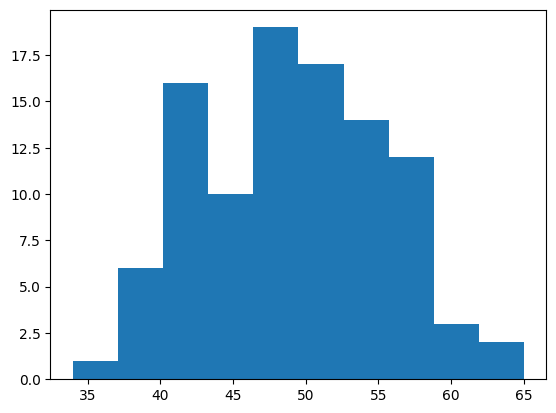

In [252]:
import matplotlib.pyplot as plt
plt.hist(conts)